### Agenda of this tutorial
__Need to familiar with array__

- Text Mining
    1. Create your sample data
    2. Vectorizer
        - 2.1 BagOfWord (Occurence)
        - 2.2 TF
        - 2.3 TF-IDF
    3. SMS data


## Sample data

In [10]:
import numpy as np

X_data = ["Apple Orange Orange Apple",
          "Apple Banana Apple Banana",
          "Banana Apple Banana Banana Banana Apple",
          "Banana Orange Banana Banana Orange Banana",
          "Banana Apple Banana Banana Orange Banana"]

y_train = np.array([0,0,1,1,1])

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_data)

data_vec = vectorizer.transform(X_data).toarray()
print(data_vec)

[[2 0 2]
 [2 2 0]
 [2 4 0]
 [0 4 2]
 [1 4 1]]


In [16]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model = DecisionTreeClassifier()
model.fit(data_vec, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

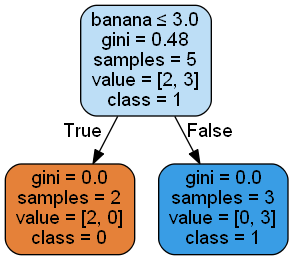

In [19]:
feature_names = ['apple','banana','orange']
class_names = ['0','1']

import os
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,  
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Load email (ham or spam)

[Load Datasets](http://www.esp.uem.es/jmgomez/smsspamcorpus/)

In [44]:
filename = 'datasets/email.txt'
lines = []
X_train = []
y_train = []

with open(filename) as f:
    lines = f.read().splitlines()
    
for line in lines:
    field = line.split("\t")
    X_train.append(field[0])
    y_train.append(field[1])

print(X_train[:5])    

['Urgent! call 09061749602 from Landline. Your complimentary 4* Tenerife Holiday or £10,000 cash await collection SAE T&Cs BOX 528 HP20 1YF 150ppm 18+', '+449071512431 URGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost 150ppm mobilesvary. max£7. 50', 'FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+', 'Urgent! call 09066612661 from landline. Your complementary 4* Tenerife Holiday or £10,000 cash await collection SAE T&Cs PO Box 3 WA14 2PX 150ppm 18+ Sender: Hol Offer', 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']


### Load SMS data

In [100]:
text_filename = 'datasets/sms_survey/sms.txt'
target_class_filename = 'datasets/sms_survey/sms_class.txt'
target_sentiment_filename = 'datasets/sms_survey/sms_sentiment.txt'
lines = []
X_train = []
y_train = []

with open(text_filename, encoding="utf8") as f:
    text = f.read().splitlines()    

with open(target_class_filename) as f:
    target_class = f.read().splitlines()
    
for i in range(10):
    X_train.append(text[i])
    y_train.append(target_class[i])


In [118]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vocabulary=['ล่าช้า', 'บริการ', 'พนักงาน', 'ดี', 'เวลา', 'คิว', 'เคาน์เตอร์', 'เปิด', 'ช่อง' , 'ลูกค้า', 'หน้าตา', 'ยิ้มแย้ม']
vectorizer = CountVectorizer(vocabulary=vocabulary, tokenizer=lambda x: x.split('|'))

#vectorizer = CountVectorizer(tokenizer=lambda x: x.split('|'))

vectorizer.fit(X_train)

data_vec = vectorizer.transform(X_train).toarray()

In [119]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model = DecisionTreeClassifier()
model.fit(data_vec, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [104]:
print(vectorizer.get_feature_names())

['ล่าช้า', 'บริการ', 'พนักงาน', 'ดี', 'เวลา', 'คิว', 'เคาน์เตอร์', 'เปิด', 'ช่อง', 'ลูกค้า', 'หน้าตา', 'ยิ้มแย้ม']


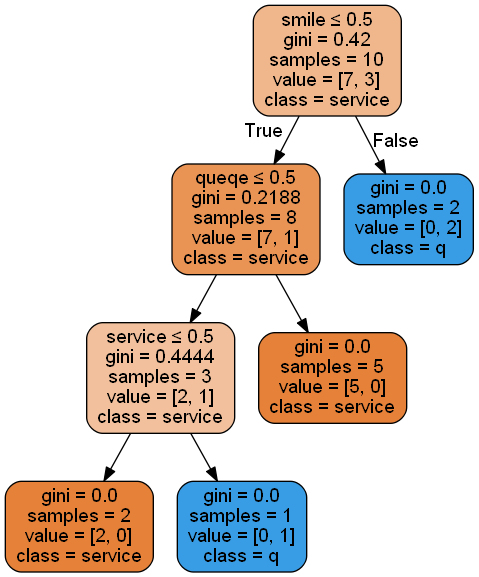

In [109]:
feature_names = ['late', 'service', 'staff', 'good', 'time', 'q', 'counter', 'open', 'boost', 'customer', 'face', 'smile']
class_names = ['service','q']

import os
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,  
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [123]:
test = ['[บริการ|ดี|ยิ้มแย้ม|]']
test_vec = vectorizer.transform(test).toarray()

predicted = model.predict(test_vec)

print(test_vec)
print(predicted)

[[0 0 0 1 0 0 0 0 0 0 0 1]]
['Staff Service']
